In [1]:
import pandas as pd
from pandas.core import datetools
import numpy as np
import datetime as dt
import time
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import statsmodels.api as sm # statsmodel 기본 import
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms 
import sklearn as sk
from patsy import dmatrix


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  


##### 스케일링 : 평균 빼고 분산으로 나눠줌 - 평균0, 분산1 로 (데이터의 중앙이 0)

In [2]:
from sklearn.preprocessing import scale, robust_scale, minmax_scale, maxabs_scale

x = (np.arange(9, dtype=np.float) -3).reshape(-1, 1)
x = np.vstack([x, [20]]) #outlier추가
df = pd.DataFrame(np.hstack([x, scale(x), robust_scale(x), minmax_scale(x), maxabs_scale(x)]),
                           columns=["x", "scale(x)", "robust_scale(x)", "mimnax_scale(x)", "maxabs_scale(x)"])
df

,x,scale(x),robust_scale(x),mimnax_scale(x),maxabs_scale(x)
0,-3.0,-0.950995,-1.000000,0.000000,-0.15
1,-2.0,-0.789809,-0.777778,0.043478,-0.10
2,-1.0,-0.628624,-0.555556,0.086957,-0.05
3,0.0,-0.467438,-0.333333,0.130435,0.00
4,1.0,-0.306253,-0.111111,0.173913,0.05
5,2.0,-0.145067,0.111111,0.217391,0.10
6,3.0,0.016119,0.333333,0.260870,0.15
7,4.0,0.177304,0.555556,0.304348,0.20
8,5.0,0.338490,0.777778,0.347826,0.25
9,20.0,2.756273,4.111111,1.000000,1.00


In [3]:
from sklearn.datasets import load_iris
iris = load_iris()

data1 = iris.data
data2 = scale(iris.data)

print("old mean:", np.mean(data1, axis=0))
print("old std:", np.std(data1, axis=0))
print("new mean:", np.mean(data2, axis=0))
print("new std:", np.std(data2, axis=0))

old mean: [ 5.84333333  3.054       3.75866667  1.19866667]
old std: [ 0.82530129  0.43214658  1.75852918  0.76061262]
new mean: [ -1.69031455e-15  -1.63702385e-15  -1.48251781e-15  -1.62314606e-15]
new std: [ 1.  1.  1.  1.]


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(data1)
data2 = scaler.transform(data1)

data1.std(), data2.std()

(1.974000985027335, 1.0)

##### 정규화(Normalization)  : 데이터 (벡터)의 크기를 1로 만든다 = 반지름 1인 원 위에 놓는다 (norm=1)

In [5]:
from sklearn.preprocessing import normalize

x = np.vstack([np.arange(5, dtype=float) -20, np.arange(5, dtype=float) -2]).T
y1 = scale(x)
y2 = normalize(x)

print("original x:\n", x)
print("scale:\n", y1)
print("norms (scale)\n", np.linalg.norm(y1, axis=1))
print("normlize:\n", y2)
print("norms (normalize)\n", np.linalg.norm(y2, axis=1))

original x:
 [[-20.  -2.]
 [-19.  -1.]
 [-18.   0.]
 [-17.   1.]
 [-16.   2.]]
scale:
 [[-1.41421356 -1.41421356]
 [-0.70710678 -0.70710678]
 [ 0.          0.        ]
 [ 0.70710678  0.70710678]
 [ 1.41421356  1.41421356]]
norms (scale)
 [ 2.  1.  0.  1.  2.]
normlize:
 [[-0.99503719 -0.09950372]
 [-0.99861783 -0.05255883]
 [-1.          0.        ]
 [-0.99827437  0.05872202]
 [-0.99227788  0.12403473]]
norms (normalize)
 [ 1.  1.  1.  1.  1.]


In [6]:
from sklearn.datasets import load_iris
iris = load_iris()

data1 = iris.data[:,:2]
data3 = normalize(data1)

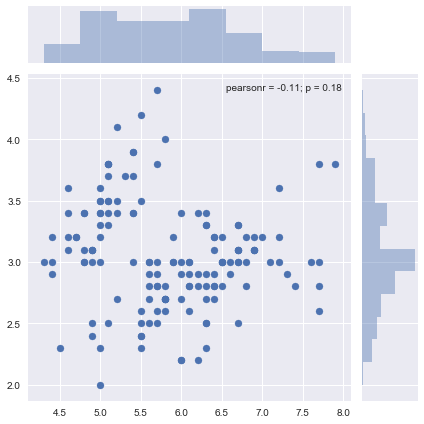

In [7]:
sns.jointplot(data1[:,0], data1[:,1])
plt.show()

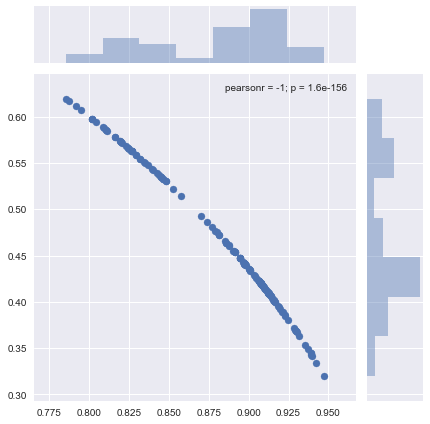

In [8]:
sns.jointplot(data3[:,0], data3[:,1])
plt.show()

##### 인코딩(Encoding)

In [9]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

In [10]:
X = np.array([[0], [1], [2]])
X

array([[0],
       [1],
       [2]])

In [11]:
ohe.fit(X)
ohe.n_values_, ohe.feature_indices_, ohe.active_features_

(array([3]), array([0, 3]), array([0, 1, 2]))

In [12]:
# one-hot-encoding의 결과를 배열로 출력하려면 "toarray()" 명령이 필요
ohe.transform(X).toarray()

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

In [13]:
X = np.array([[0, 0, 4], [1, 1, 0], [0, 2, 1], [1, 0, 2]])
X

array([[0, 0, 4],
       [1, 1, 0],
       [0, 2, 1],
       [1, 0, 2]])

In [14]:
#ohe.n_values_ : 1열 2개(0,1), 2열 3개(0,1,2), 3열 4개(0,1,2,4) + 1(3있다고 생각)
#ohe.feature_indices_ : 1열 2개 (0번째~1번째) / 2열 3개 (2번째~4번째) / 3열 5개(5번째~9번째
#ohe.active_features_ : 실제로 유효한 변수는 9개 (0~7번째, 9번째) - 마지막에 3이 있다고 가정했기때문에
ohe.fit(X)
ohe.n_values_, ohe.feature_indices_, ohe.active_features_

(array([2, 3, 5]), array([ 0,  2,  5, 10]), array([0, 1, 2, 3, 4, 5, 6, 7, 9]))

In [15]:
#변수가 9개이므로 총 9열로 출력
ohe.transform(X).toarray()

array([[ 1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.],
       [ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  0.]])

In [16]:
#categorical_features=[False,True,False] : X의 두번째 열이 카테고리 변수
#카테고리 변수를 맨 앞으로 빼주고 변수 개수만큼 열이 추가 : 
#아래의 1~3번째 열, 이후 X의 첫번째 열, 세번째 열
ohe = OneHotEncoder(categorical_features=[False, True, False])
ohe.fit_transform(X).toarray()

array([[ 1.,  0.,  0.,  0.,  4.],
       [ 0.,  1.,  0.,  1.,  0.],
       [ 0.,  0.,  1.,  0.,  1.],
       [ 1.,  0.,  0.,  1.,  2.]])

In [17]:
#결과가 왜 이렇게 나오지?
ohe.n_values_, ohe.feature_indices_, ohe.active_features_

(array([3]), array([0, 3]), array([0, 1, 2]))

##### Imputer

In [18]:
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp.fit_transform([[1, 2], [np.nan, 3], [7, 6]])

array([[ 1.,  2.],
       [ 4.,  3.],
       [ 7.,  6.]])

##### Binarizer

In [19]:
from sklearn.preprocessing import Binarizer
X = [[ 1., -1.,  2.],
     [ 2.,  0.,  0.],
     [ 0.,  1., -1.]]
binarizer = Binarizer().fit(X) 
binarizer.transform(X)

array([[ 1.,  0.,  1.],
       [ 1.,  0.,  0.],
       [ 0.,  1.,  0.]])

In [20]:
binarizer = Binarizer(threshold=1.1)
binarizer.transform(X)

array([[ 0.,  0.,  1.],
       [ 1.,  0.,  0.],
       [ 0.,  0.,  0.]])

##### PolynomialFeatures

In [21]:
from sklearn.preprocessing import PolynomialFeatures
X = np.arange(6).reshape(3, 2)
X

array([[0, 1],
       [2, 3],
       [4, 5]])

In [22]:
poly = PolynomialFeatures(2)
poly.fit_transform(X)

array([[  1.,   0.,   1.,   0.,   0.,   1.],
       [  1.,   2.,   3.,   4.,   6.,   9.],
       [  1.,   4.,   5.,  16.,  20.,  25.]])

In [23]:
poly = PolynomialFeatures(interaction_only=True)
poly.fit_transform(X)

array([[  1.,   0.,   1.,   0.],
       [  1.,   2.,   3.,   6.],
       [  1.,   4.,   5.,  20.]])

##### FunctionTransformer

In [24]:
from sklearn.preprocessing import FunctionTransformer

def kernel(X):
    x0 = X[:, :1]
    x1 = X[:, 1:2]
    x2 = X[:, 2:3]
    X_new = np.hstack([x0, 2 * x1, x2 **2, np.log(x1)])
    return X_new

In [25]:
X = np.arange(12).reshape(4,3)
X

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [26]:
kernel(X)

array([[   0.        ,    2.        ,    4.        ,    0.        ],
       [   3.        ,    8.        ,   25.        ,    1.38629436],
       [   6.        ,   14.        ,   64.        ,    1.94591015],
       [   9.        ,   20.        ,  121.        ,    2.30258509]])

In [27]:
FunctionTransformer(kernel).fit_transform(X)

array([[   0.        ,    2.        ,    4.        ,    0.        ],
       [   3.        ,    8.        ,   25.        ,    1.38629436],
       [   6.        ,   14.        ,   64.        ,    1.94591015],
       [   9.        ,   20.        ,  121.        ,    2.30258509]])

##### Label Binarizer

In [28]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
y = ['A', 'B', 'A', 'A', 'B', 'C', 'C', 'A', 'C', 'B']
lb.fit(y)

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

In [29]:
lb.classes_

array(['A', 'B', 'C'],
      dtype='<U1')

In [30]:
y2 = lb.transform(y)
y2

array([[1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0]])

In [31]:
lb.inverse_transform(y2)

array(['A', 'B', 'A', 'A', 'B', 'C', 'C', 'A', 'C', 'B'],
      dtype='<U1')

##### Label Encoding

In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit([1, 2, 2, 6])
le.classes_

array([1, 2, 6])

In [33]:
le.transform([1, 1, 2, 6])

array([0, 0, 1, 2])

In [34]:
le.inverse_transform([0, 0, 1, 2])

array([1, 1, 2, 6])

In [35]:
le.fit(["paris", "paris", "tokyo", "amsterdam"])
le.classes_

array(['amsterdam', 'paris', 'tokyo'],
      dtype='<U9')

In [36]:
le.transform(["tokyo", "tokyo", "paris"])

array([2, 2, 1])

In [37]:
list(le.inverse_transform([2, 2, 1]))

['tokyo', 'tokyo', 'paris']